In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Import Dataset

In [2]:
house_set=pd.read_csv("kc_house_data.csv")
house_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Cleaning

# Check correlation, drop if>70

<AxesSubplot:>

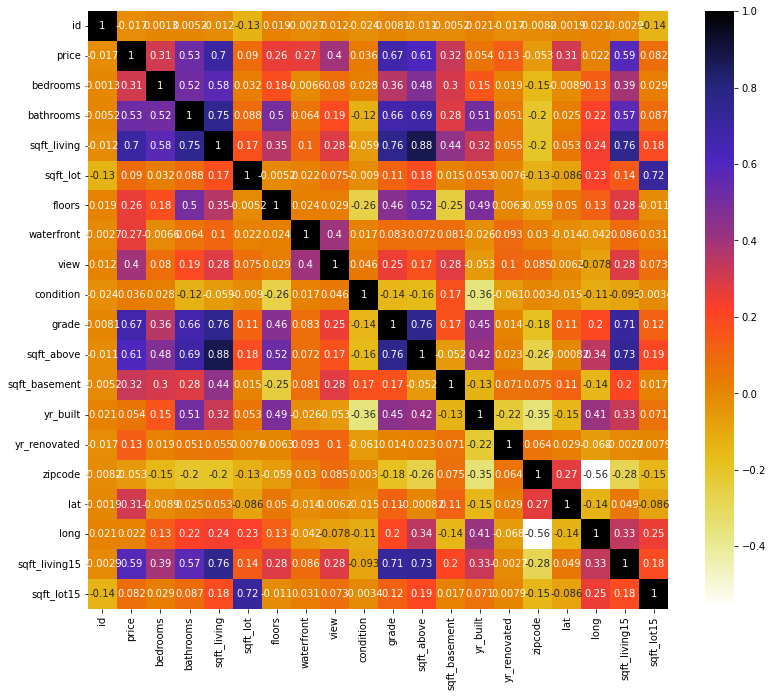

In [3]:
plt.figure(figsize=(13,11))
cor=house_set.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)

In [4]:
dropc=['sqft_above']
house_set.drop(dropc, inplace=True, axis=1)

<AxesSubplot:>

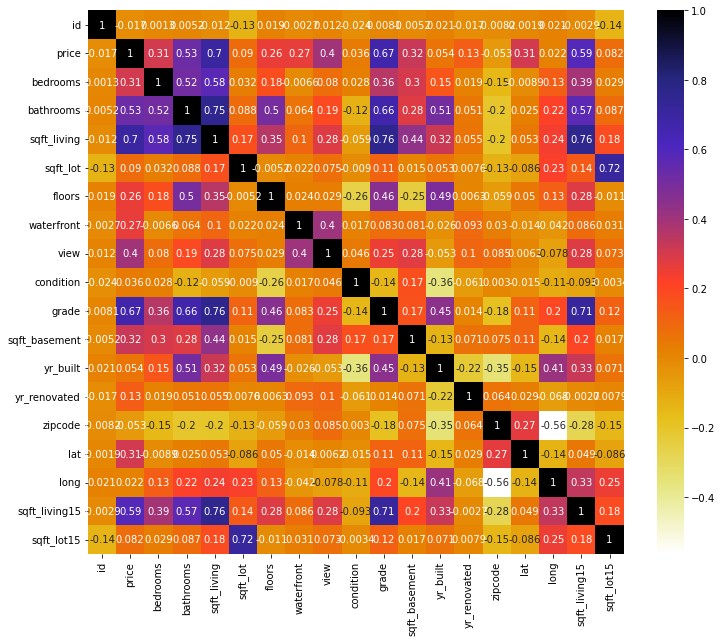

In [5]:
plt.figure(figsize=(12,10))
cor=house_set.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)

In [6]:
dropc=['sqft_living']
house_set.drop(dropc, inplace=True, axis=1)

<AxesSubplot:>

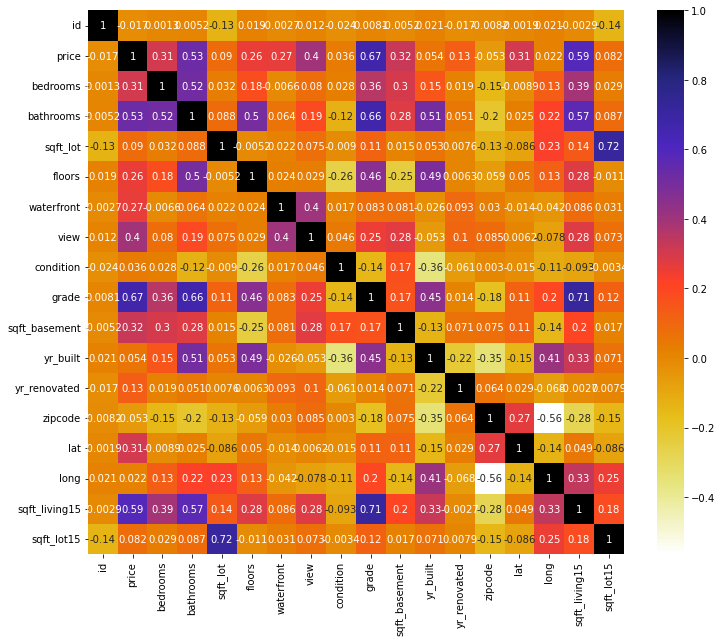

In [7]:
plt.figure(figsize=(12,10))
cor=house_set.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)

# cleaning Empty cells

In [8]:
house_set.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# cleaning wrong format

In [9]:
house_set['date'] = pd.to_datetime(house_set['date'])

In [10]:
house_set.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
house_set = house_set.astype({"bathrooms":'int'}) 

In [12]:
house_set.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
house_set = house_set.astype({"floors":'int'}) 

In [14]:
house_set.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,5650,1,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,7242,2,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,10000,1,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,5000,1,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,8080,1,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


# Clean duplicated data

In [15]:
df=house_set.duplicated()
print(df.to_string())

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

# Describe data

In [16]:
print(house_set.describe())

                 id         price      bedrooms     bathrooms      sqft_lot  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  2.161300e+04   
mean   4.580302e+09  5.400881e+05      3.370842      1.749734  1.510697e+04   
std    2.876566e+09  3.671272e+05      0.930062      0.734873  4.142051e+04   
min    1.000102e+06  7.500000e+04      0.000000      0.000000  5.200000e+02   
25%    2.123049e+09  3.219500e+05      3.000000      1.000000  5.040000e+03   
50%    3.904930e+09  4.500000e+05      3.000000      2.000000  7.618000e+03   
75%    7.308900e+09  6.450000e+05      4.000000      2.000000  1.068800e+04   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.446213      0.007542      0.234303      3.409430      7.656873   
std        0.551894      0.086517      0.766318    

In [17]:
house_set.drop("date", axis=1,inplace = True)

In [18]:
house_set.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1,5650,1,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2,7242,2,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1,10000,1,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3,5000,1,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2,8080,1,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


# define features and labels

In [19]:
#droping the diagnosis column to get the features data
features=house_set.drop(['price'],axis=1)

#labels data
labels=house_set['price']

# clean outliers

C:\Users\Ruby Computer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


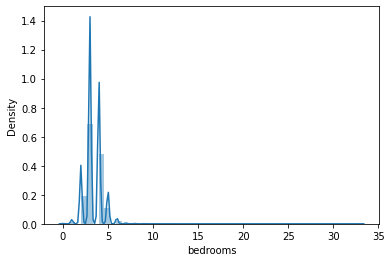

In [20]:
sns.distplot(features['bedrooms'])
plt.show()

In [21]:
q = house_set['bedrooms'].quantile(0.99)
print(q)
house_set= house_set[house_set['bedrooms']<q]
print(house_set['bedrooms'].count())

6.0
21279


In [22]:
house_set.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1,5650,1,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2,7242,2,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1,10000,1,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3,5000,1,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2,8080,1,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
house_set.describe()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.127900e+04,2.127900e+04,21279.000000,21279.000000,2.127900e+04,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000
mean,4.583562e+09,5.352174e+05,3.323652,1.732835,1.506049e+04,1.444617,0.007472,0.229898,3.408525,7.649796,283.368908,1971.146858,83.007660,98077.897740,47.559623,-122.213434,1982.004934,12744.596034
std,2.877655e+09,3.545496e+05,0.832024,0.712970,4.146919e+04,0.551957,0.086120,0.758427,0.650207,1.170378,432.356193,29.340795,398.493986,53.500988,0.138851,0.141242,682.186104,27206.142122
min,1.200019e+06,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123875e+09,3.200000e+05,3.000000,1.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.469500,-122.328000,1480.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.000000,7.600000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.571300,-122.229000,1830.000000,7620.000000
75%,7.325250e+09,6.399000e+05,4.000000,2.000000,1.062500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,540.000000,1997.000000,0.000000,98117.000000,47.678100,-122.124000,2360.000000,10079.000000
max,9.900000e+09,7.062500e+06,5.000000,6.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


C:\Users\Ruby Computer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


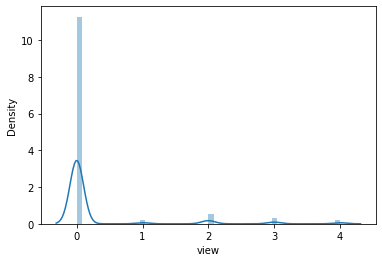

In [24]:
sns.distplot(features['view'])
plt.show()

C:\Users\Ruby Computer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


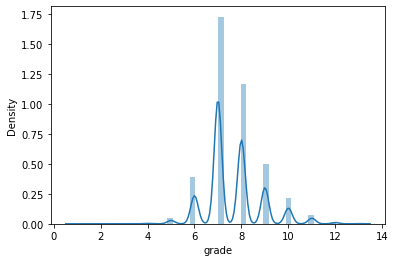

In [25]:
sns.distplot(features['grade'])
plt.show()

C:\Users\Ruby Computer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


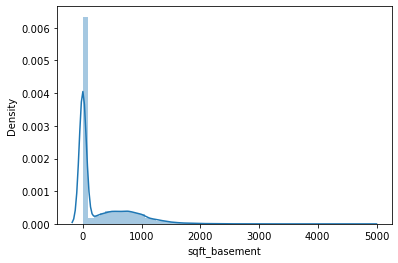

In [26]:
sns.distplot(features['sqft_basement'])
plt.show()

In [27]:
q = house_set['sqft_basement'].quantile(0.99)
print(q)
house_set= house_set[house_set['sqft_basement']<q]
print(house_set['sqft_basement'].count())

1610.0
21064


C:\Users\Ruby Computer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


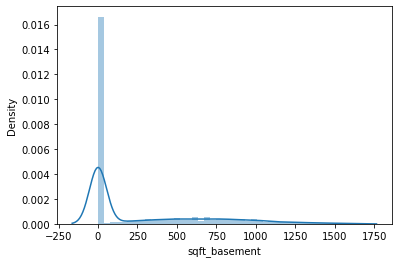

In [28]:
sns.distplot(house_set['sqft_basement'])
plt.show()

In [29]:
house_set.describe()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.106400e+04,2.106400e+04,21064.000000,21064.000000,2.106400e+04,21064.000000,21064.000000,21064.000000,21064.000000,21064.000000,21064.000000,21064.000000,21064.000000,21064.000000,21064.000000,21064.000000,21064.000000,21064.000000
mean,4.585098e+09,5.260064e+05,3.314470,1.720946,1.487915e+04,1.446259,0.006646,0.215011,3.406381,7.629842,266.598937,1971.087828,82.048899,98078.091531,47.559328,-122.213582,1969.947161,12585.070784
std,2.878766e+09,3.299911e+05,0.828071,0.698807,4.093048e+04,0.552567,0.081256,0.729959,0.648840,1.152002,399.587395,29.402434,396.271012,53.432725,0.139119,0.141433,670.921335,26324.162796
min,1.200019e+06,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.200000e+05,3.000000,1.000000,5.011750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.468800,-122.329000,1480.000000,5100.000000
50%,3.904961e+09,4.470000e+05,3.000000,2.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.570900,-122.231000,1830.000000,7596.000000
75%,7.327500e+09,6.315000e+05,4.000000,2.000000,1.050000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,520.000000,1997.000000,0.000000,98118.000000,47.678300,-122.124000,2340.000000,10008.000000
max,9.900000e+09,5.350000e+06,5.000000,6.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,1600.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


C:\Users\Ruby Computer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


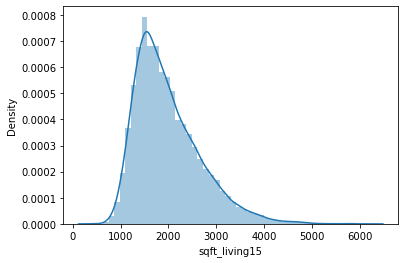

In [30]:
sns.distplot(features['sqft_living15'])
plt.show()

In [31]:
q = house_set['sqft_living15'].quantile(0.99)
print(q)
house_set= house_set[house_set['sqft_living15']<q]
print(house_set['sqft_living15'].count())

3990.0
20847


C:\Users\Ruby Computer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


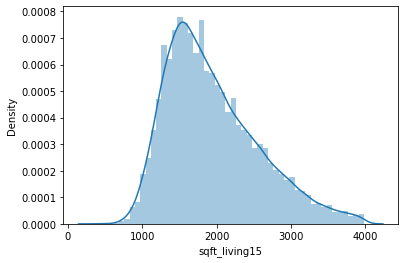

In [32]:
sns.distplot(house_set['sqft_living15'])
plt.show()

In [33]:
house_set.describe()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.084700e+04,2.084700e+04,20847.000000,20847.000000,2.084700e+04,20847.000000,20847.000000,20847.000000,20847.000000,20847.000000,20847.000000,20847.000000,20847.000000,20847.000000,20847.000000,20847.000000,20847.000000,20847.000000
mean,4.586280e+09,5.170765e+05,3.305655,1.706624,1.471232e+04,1.441454,0.006524,0.207608,3.408788,7.598407,265.171440,1970.855327,82.328297,98078.425913,47.559074,-122.214838,1944.185063,12408.689787
std,2.878611e+09,3.135191e+05,0.825060,0.683115,4.092487e+04,0.552193,0.080508,0.717628,0.650106,1.111372,397.515214,29.387139,396.915531,53.486242,0.139542,0.141103,623.270981,26148.725174
min,1.200019e+06,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123375e+09,3.190000e+05,3.000000,1.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.466900,-122.330000,1480.000000,5075.000000
50%,3.904930e+09,4.450000e+05,3.000000,2.000000,7.523000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.570900,-122.233000,1820.000000,7560.000000
75%,7.334401e+09,6.250000e+05,4.000000,2.000000,1.040300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,520.000000,1996.000000,0.000000,98118.000000,47.678600,-122.126000,2320.000000,9946.000000
max,9.900000e+09,4.500000e+06,5.000000,6.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,1600.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3980.000000,858132.000000


In [34]:
q = house_set['sqft_lot15'].quantile(0.99)
print(q)
house_set= house_set[house_set['sqft_lot15']<q]
print(house_set['sqft_lot15'].count())

150713.4600000007
20638


C:\Users\Ruby Computer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


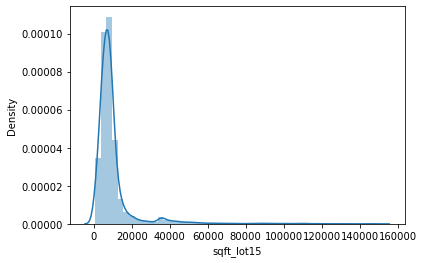

In [35]:
sns.distplot(house_set['sqft_lot15']) 
plt.show()

In [36]:
features

,id,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1,5650,1,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2,7242,2,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1,10000,1,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3,5000,1,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2,8080,1,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,3,2,1131,3,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,4,2,5813,2,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2,0,1350,2,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,3,2,2388,2,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410,1287


In [37]:
labels

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [38]:
labels.count()

21613

# Split data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)

# Train the algorithm

In [40]:
house_set.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1,5650,1,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2,7242,2,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1,10000,1,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3,5000,1,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2,8080,1,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [41]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
print(regressor.intercept_)

12728605.795517849


In [43]:
print(regressor.coef_)

[-1.74152979e-06 -3.19893621e+03  8.80183394e+04  2.24956188e-01
  3.19986800e+04  5.74414919e+05  5.26473904e+04  2.68223964e+04
  1.41521473e+05  5.90504669e+01 -3.01023113e+03  2.48118723e+01
 -5.12119282e+02  5.58657652e+05 -1.29469943e+05  9.37829564e+01
 -2.11741868e-01]


In [44]:
y_pred = regressor.predict(X_test)

In [45]:
error=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root mean squared error: %.2f'
      % error)

Root mean squared error: 207736.88


In [46]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test,y_pred))

Coefficient of determination: 0.68
